In [1]:
sampler_size = 100000

In [2]:
!pip install zfit==0.5.6 
!pip install mplhep

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#ls drive/MyDrive/colab2021/scripts

In [5]:
# Following https://stackoverflow.com/a/64604031
import sys
import time

from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
! pip install seaborn

  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: -ensorflow 2.3.4 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.24.4 which is incompatible.
ERROR: tensorflow 2.3.4 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.24.4 which is incompatible.
ERROR: tensorboard 2.13.0 has requirement grpcio>=1.48.2, but you'll have grpcio 1.46.1 which is incompatible.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [7]:
# ! pip install numpy==1.21.5 --user
# Changing the version to avoid error for slsqp minimization

! pip install numpy==1.19.5 --user


  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
ERROR: -ensorflow 2.3.4 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: tensorflow 2.3.4 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: tensorboard 2.13.0 has requirement grpcio>=1.48.2, but you'll have grpcio 1.46.1 which is incompatible.
ERROR: seaborn 0.13.0 has requirement numpy!=1.24.0,>=1.20, but you'll have numpy 1.19.5 which is incompatible.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


In [8]:

! pip install protobuf==3.20.0 --user


In [9]:
#sys.path.append('drive/MyDrive/colab2021/scripts')
import matplotlib.pyplot as plt
import plot_tools
import zfit
import customPDFs
import numpy as np
import pandas as pd

2023-11-27 21:50:28.286692: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2023-11-27 21:50:28.286782: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-27 21:50:29.473102: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-27 21:50:29.473159: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-27 21:50:29.473178: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-KJ9UEOTB): /proc/driver/nvidia/version does not exist
2023-11-27 21:50:29.473427: I tensorflow/core/platform/cpu_fe

In [10]:
#Create the new space, model and parameters

In [11]:
print(np.__version__)

1.19.5


In [12]:
import matplotlib

In [13]:
#! pip show matplotlib
print(matplotlib.__version__)

3.5.2


In [14]:
# Setting the seed for zfit
zfit.settings.set_seed(seed=42)

In [15]:
cos = zfit.Space('cosThetaKMu', [-1,1])

In [16]:
AFB = zfit.Parameter('AFB', 0.1)
FH = zfit.Parameter('FH', 0.1)

In [17]:
decay_rate = customPDFs.decayWidth(AFB, FH, cos) # Crea una PDF del Base PDF de zfit

In [18]:
cos_np = np.linspace(-1, 1, 1000)

Text(1, 0, '$\\cos\\theta_{\\ell}$')

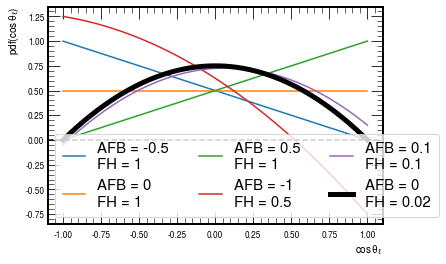

In [19]:
for afb,fh in zip([-0.5, 0, 0.5, -1, 0.1], 
                     [1, 1,   1,0.5, 0.1]):
  AFB.set_value(afb)
  FH.set_value(fh)
  plt.plot(cos_np, decay_rate.pdf(cos_np), label=f'AFB = {afb}\nFH = {fh}')

AFB.set_value(0), FH.set_value(0)
plt.plot(cos_np, decay_rate.pdf(cos_np), label=f'AFB = {0}\nFH = {0.02}', linewidth=5, color='black', ls='-')

plt.legend(frameon=True, ncol=3, fontsize=15)
plt.axhline(0, color='black', ls='--')
plt.ylabel(r'pdf($\cos\theta_{\ell}$)')
plt.xlabel(r'$\cos\theta_{\ell}$')

In [20]:
path = './samplers/'

In [21]:
AFB.set_value(0.1), FH.set_value(0.1)
#AFB.set_value(0), FH.set_value(1)
sampler = decay_rate.create_sampler(sampler_size)
sampler = sampler.from_numpy(cos, np.load(f'{path}decay_rate_sampler.npy'))

(array([ 819., 2129., 3331., 4304., 5219., 5954., 6550., 7061., 7351.,
        7481., 7332., 7244., 6981., 6466., 5969., 5180., 4282., 3353.,
        2143.,  851.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

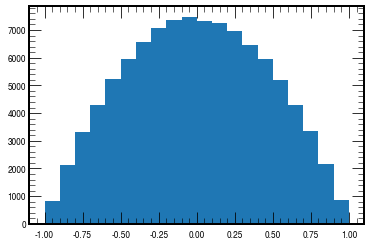

In [22]:
plt.hist(sampler.numpy(), bins=20, range=[-1,1])

/home/carlos/projects/Ayudantia/py/plot_tools.py:692: UserWarning: The function <function Space.limit1d at 0x7fb19b600dc0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('cosThetaKMu',), axes=(0,), limits=(array([[-1.]]), array([[1.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  limits = pdf.norm_range.limit1d


'decayWidth' object has no attribute 'models'


(array([ 819., 2129., 3331., 4304., 5219., 5954., 6550., 7061., 7351.,
        7481., 7332., 7244., 6981., 6466., 5969., 5180., 4282., 3353.,
        2143.,  851.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

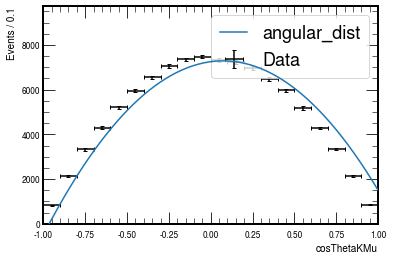

In [23]:
plot_tools.plot_model(sampler.numpy(), decay_rate, 
                      bins=20, density=True)

In [24]:
# Declared this variable
º = sampler.numpy()

In [25]:
# No tiene subclase float64 en este caso, posiblemente por el sistema operativo o hardware
np.float

float

'decayWidth' object has no attribute 'models'


((array([ 819., 2129., 3331., 4304., 5219., 5954., 6550., 7061., 7351.,
         7481., 7332., 7244., 6981., 6466., 5969., 5180., 4282., 3353.,
         2143.,  851.]),
  array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
          0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])),
 4256.8995826978135)

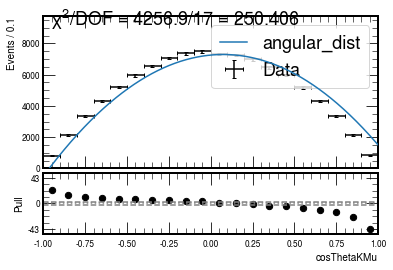

In [26]:
from matplotlib._api import check_in_list
fig = plt.figure()
axes = plot_tools.create_axes_for_pulls(fig)
plot_tools.plot_model(º, decay_rate, bins=20, 
                  axis=axes[0], pulls=True, axis_pulls=axes[1], 
                  chi_x=0.02, chi_y=0.9)

In [27]:
import SLSQP_zfit

In [28]:
decay_rate.params

OrderedDict([('AFB', <zfit.Parameter 'AFB' floating=True value=0.1>),
             ('FH', <zfit.Parameter 'FH' floating=True value=0.1>)])

In [29]:
constraints = SLSQP_zfit.create_constraint(decay_rate) #una constraint se crea con una pdf
# Constraints are a dictionary with 'type' and 'fun' arguments
# Creates a new minimizer implementation from the base minimizer
SLSQP = SLSQP_zfit.SLSQP(constraints=constraints)

0 1
ftol not in minizer_options


In [30]:
nll = zfit.loss.UnbinnedNLL(decay_rate, sampler)

In [31]:
nll.get_params()

OrderedSet([<zfit.Parameter 'AFB' floating=True value=0.1>, <zfit.Parameter 'FH' floating=True value=0.1>])

In [32]:
nll.value()

<tf.Tensor: shape=(), dtype=float64, numpy=nan>

In [33]:
start = time.time()
# Minimization with zfit minuit

MIN = zfit.minimize.Minuit()
minimum = MIN.minimize(nll)

end = time.time()
print("Minimization time with Minuit", end - start)

start = time.time()
minimum.hesse()
end = time.time()
print("Hessian error time with Minuit", end - start)

/home/carlos/.local/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


RuntimeError: exception was raised in user function
User function arguments:
    AFB = +nan
     FH = +0.100000
Original python exception in user function:
RuntimeError: Loss starts already with NaN, cannot minimize.
  File "/home/carlos/.local/lib/python3.8/site-packages/zfit/minimizers/minimizer_minuit.py", line 120, in func
    loss_evaluated = self.strategy.minimize_nan(loss=loss, params=params, minimizer=minimizer,
  File "/home/carlos/.local/lib/python3.8/site-packages/zfit/minimizers/baseminimizer.py", line 47, in minimize_nan
    return self._minimize_nan(loss=loss, params=params, minimizer=minimizer, values=values)
  File "/home/carlos/.local/lib/python3.8/site-packages/zfit/minimizers/baseminimizer.py", line 107, in _minimize_nan
    raise RuntimeError("Loss starts already with NaN, cannot minimize.")


In [ ]:
minimum

In [34]:
start = time.time()

minimum = SLSQP.minimize(nll)
# Esto devolvía un error al correr en versiones anteriores
# El error indica lo siguiente:
# NotImplementedError: Cannot convert a symbolic Tensor (gradients/gradients/AddN_16/inputs_1_grad/sub:0) to a numpy array. 
# This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

# Solución encontrada en Stack Overflow:
# https://stackoverflow.com/questions/58479556/notimplementederror-cannot-convert-a-symbolic-tensor-2nd-target0-to-a-numpy

# numpy==1.19.5

end = time.time()
print("Minimization time with SLSQP zfit", end - start)

start = time.time()
minimum.hesse()
end = time.time()
print("Hessian error time with SLSQP zfit", end - start)

InvalidArgumentError:  Check if pdf output contains any NaNs of Infs : Tensor had NaN values
	 [[{{node StatefulPartitionedCall/CheckNumerics}}]] [Op:__inference__loss_func_3315]

Function call stack:
_loss_func


In [ ]:
minimum

In [ ]:
#import SLSQPv2

In [ ]:
# constraints = SLSQPv2.create_constraint(decay_rate) #una constraint se crea con una pdf
# # Constraints are a dictionary with 'type' and 'fun' arguments
# # Creates a new minimizer implementation from the base minimizer
# SLSQP = SLSQPv2.SLSQP(constraints=constraints)

In [ ]:
# # Testing with the other version os SLSQPv2

# start = time.time()

# minimum = SLSQP.minimize(nll)
# # Esto devolvía un error al correr en versiones anteriores
# # El error indica lo siguiente:
# # NotImplementedError: Cannot convert a symbolic Tensor (gradients/gradients/AddN_16/inputs_1_grad/sub:0) to a numpy array. 
# # This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

# # Solución encontrada en Stack Overflow:
# # https://stackoverflow.com/questions/58479556/notimplementederror-cannot-convert-a-symbolic-tensor-2nd-target0-to-a-numpy

# # numpy==1.19.5
# minimum.hesse()

# end = time.time()
# print("Minimization time with SLSQP zfit", end - start)

In [ ]:
# Anotehr minimization with minuit
minuit = zfit.minimize.Minuit()

start = time.time()
minimum_minuit = minuit.minimize(nll)


end = time.time()
print("Minimization time with Minuit", end - start)

start = time.time()
minimum_minuit.hesse()
end = time.time()
print("Hesse errors time with Minuit", end - start)

In [ ]:
minimum_minuit

In [ ]:
minimum

In [ ]:
from matplotlib._api import check_in_list
fig = plt.figure()
axes = plot_tools.create_axes_for_pulls(fig)
plot_tools.plot_model(sampler.numpy(), decay_rate, bins=20, 
                  axis=axes[0], pulls=True, axis_pulls=axes[1], 
                chi_x=0.02, chi_y=0.9, print_params=minimum, 
                data_kwargs = {'capsize': 3, 'color': 'black', 'ms':3, 'marker':'s'},
                params_text_opts={'x':0.4, 'y':0.2, 'ncol':1, 'fontsize': 15})
#axes[0].set_yscale('log')
#axes[0].set_ylim(1e5, 1e6)